## Assignment 1 
### \<Joseph Kiragu> \<a1821114>

#### Common downloads

In [10]:
import nltk
from sklearn.metrics import accuracy_score
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/josephkiragu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### 1. Reading datasets

#### Reading training set

In [3]:
# opening the file
with open('reviews_train.txt', 'r', encoding = 'ISO-8859-1') as file:
	lines = file.readlines()

# initializing empty list to store train set words
x_train = []
y_train = []

for line in lines:
	parts = line.split(' ', 1)
	first_word = parts[0]
	rest_of_words = parts[1]

	x_train.append(rest_of_words)
	y_train.append(first_word)
	

#### Reading test set

In [4]:
# opening the file
with open('reviews_test.txt', 'r', encoding= 'ISO-8859-1') as file:
	lines = file.readlines()

# initializing empty list to store the test set words
x_test = []
y_test = []

for line in lines :
	parts = line.split(' ', 1)
	first_word = parts[0]
	rest_of_words = parts[1]

	x_test.append(rest_of_words)
	y_test.append(first_word)

### 2. Pre-processing

### Version 1

##### Removing punctuation marks

In [11]:
import string

# initialize empty lists to store result after punctuation removal
x_train_punc = []
x_test_punc = []

#loop through the train and test set removing the punctuation marks
for sentiment in x_train :
	edit = sentiment.translate(sentiment.maketrans('', '', string.punctuation))
	x_train_punc.append(edit)

for sentiment in x_test :
	edit = sentiment.translate(sentiment.maketrans('', '', string.punctuation))
	x_test_punc.append(edit)

##### Removing stop words

In [7]:
##### CREATE FUNCTION OFF BELOW CODE
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# create empty lists to store result after stop word removal
x_train_stop = []
x_test_stop = []
stopWords = set(stopwords.words('english'))

#loop through the train and test set removing the stop words
for index, sentence in enumerate(x_train_punc):
	tokens = word_tokenize(sentence)
	non_stop_words = [word for word in tokens if word.lower() not in stopWords]
	x_train_stop.append(' '.join(non_stop_words))

for index, sentence in enumerate(x_test_punc):
	tokens = word_tokenize(sentence)
	non_stop_words = [word for word in tokens if word.lower() not in stopWords]
	x_test_stop.append(' '.join(non_stop_words))


v1_train = x_train_stop
v1_test = x_test_stop

#### Version 2

Perform lowercasing on version 1

In [8]:
# create empty lists to store result after lowercasing
v2_train = []
v2_test = []

#loop through the train and test set performing lowercasing
lowerCaseWords = []
for sentence in v1_train :
	lowerCaseWords = [word.lower() for word in sentence]
	v2_train.append(''.join(lowerCaseWords))

lowerCaseWords = []
for sentence in v1_test :
	lowerCaseWords = [word.lower() for word in sentence]
	v2_test.append(''.join(lowerCaseWords))
	


#### Version 3

perform stemming or lemmatisation of words on version2 

In [9]:
from nltk.stem import WordNetLemmatizer

# initialize lists to store the lemmatized words
v3_train = []
v3_test = []

# create the lemmatizer object
lemmatizer = WordNetLemmatizer()

# loop through version 2 train set lemmatizing the words in each sentence
for sentence in v2_train :
	v3_tokens = word_tokenize(sentence)
	lemmatizedWords = [lemmatizer.lemmatize(word) for word in v3_tokens]
	v3_train.append(' '.join(lemmatizedWords))

for sentence in v2_test :
	v3_tokens = word_tokenize(sentence)
	lemmatizedWords = [lemmatizer.lemmatize(word) for word in v3_tokens]
	v3_test.append(' '.join(lemmatizedWords))


### 3. Dataset analysis

#### proportion of positive and negative sentiments

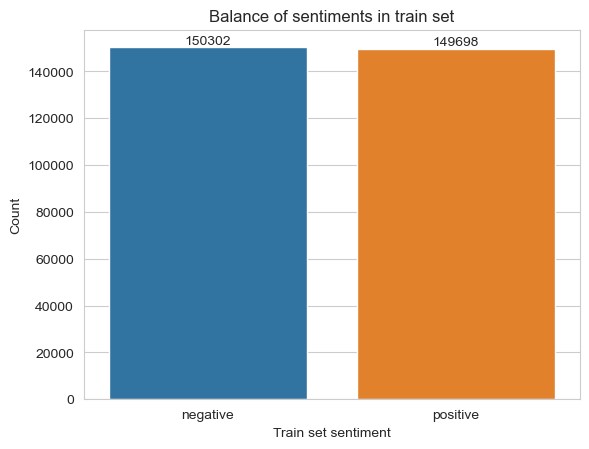

In [90]:
from collections import Counter


# rename labels to positive and negative
y_train = list(map(lambda x: x.replace('__label__1', 'negative').replace('__label__2', 'positive'), y_train))
y_test = list(map(lambda x: x.replace('__label__1', 'negative').replace('__label__2', 'positive'), y_test))


# Count the number of occurrences of each label
countDict = {}
for label in y_train :
	countDict[label] = countDict.get(label, 0) + 1

# create barplot
sns.set_style("whitegrid")
ax = sns.barplot(x = list(countDict.keys()), y = list(countDict.values()))

# Add actual count on bars
for i, count in enumerate(countDict.values()) :
	ax.text(i, count, str(count), ha= 'center', va = 'bottom')

# Set x-label y-label
ax.set(xlabel = 'Train set sentiment', ylabel = 'Count')
plt.title("Balance of sentiments in train set")
plt.show()


#### Number of unique words in all three versions

In [13]:
# initialize empty sets to store unique words of each versioon
v1_vector = set()
v2_vector = set()
v3_vector = set()

# initialize variables to store the count of unique words
v1Count = 0
v2Count = 0
v3Count = 0

#loop through the 3 different versions storing the unique words in respective sets 
for sentence in v1_train:
    for word in sentence.split():
        v1_vector.add(word)

for sentence in v2_train:
    for word in sentence.split():
        v2_vector.add(word)

for sentence in v3_train:
    for word in sentence.split():
        v3_vector.add(word)

# store the count
v1Count = len(v1_vector)
v2Count = len(v2_vector)
v3Count = len(v3_vector)
	

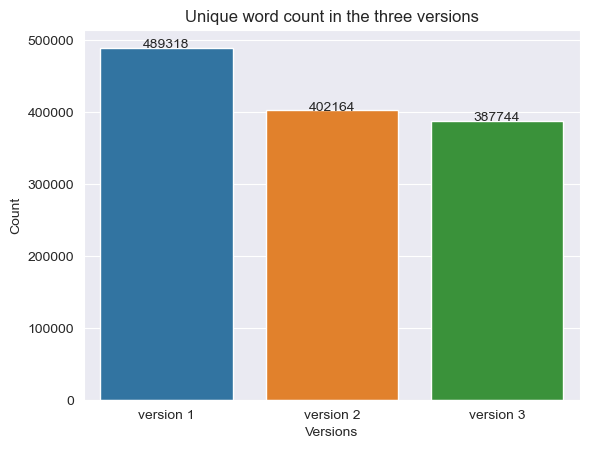

In [14]:
#store unique the unique version counts in a list
data = [v1Count, v2Count, v3Count]

#set style
sns.set_style("darkgrid")

sns.barplot(x = ['version 1', 'version 2', 'version 3'], y = data)
plt.title("Unique word count in the three versions")
plt.ylabel('Count')
plt.xlabel('Versions')

for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center')

# show plot
plt.show()

# MODELLING

### 4. Sentiment classification using Machine Learning

#### Feature extraction

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# create vectorizer object
vectorizer = CountVectorizer()

# convert the three dataset versions into numerical representation
v1_xtrain_v = vectorizer.fit_transform(v1_train)
v1_xtest_v = vectorizer.transform(v1_test)

v2_xtrain_v = vectorizer.fit_transform(v2_train)
v2_xtest_v = vectorizer.transform(v2_test)

v3_xtrain_v = vectorizer.fit_transform(v3_train)
v3_xtest_v = vectorizer.transform(v3_test)

## Random Forest Classifier

##### Version 1

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

rfC = RandomForestClassifier(min_samples_leaf=10,criterion='entropy',random_state=0)

# defining a function to perform fitting prediction and accuracy
def fitPredict (v1_xtrain_v, y_train, v1_xtest_v, y_test, model) :
    # model training
    model.fit(v1_xtrain_v, y_train)

    # model prediction
    yPred = model.predict(v1_xtest_v)
    
	#training accuracy
    trainSetAccuracy = model.score(v1_xtrain_v, y_train)

    #accuracy and recall measure on test set
    testSetAccuracy = accuracy_score(y_test, yPred)
    testSetRecall = recall_score(y_test, yPred, pos_label = 'positive')

    return trainSetAccuracy, testSetAccuracy, testSetRecall

v1_RfcTrainAcc, v1_RfcTestAcc, v1_RfcTestRecall = fitPredict (v1_xtrain_v, y_train, v1_xtest_v, y_test, rfC)

In [30]:
print(f"Train set Accuracy for version 1 random forest = {v1_RfcTrainAcc}")
print(f"Test set Accuracy score for version 1 random forest = {v1_RfcTestAcc}")
print(f"Test set Recall score for version 1 random forest = {v1_RfcTestRecall}")

Train set Accuracy for version 1 random forest = 0.86931
Test set Accuracy score for version 1 random forest = 0.85994
Test set Recall score for version 1 random forest = 0.8563277802075464


#### Version 2

In [28]:
# initialize classifier object
rfC_2 = RandomForestClassifier(min_samples_leaf=10,criterion='entropy',random_state=0)

# fit and predict
v2_RfcTrainAcc, v2_RfcTestAcc, v2_RfcTestRecall = fitPredict (v2_xtrain_v, y_train, v2_xtest_v, y_test, rfC_2)

In [29]:
print(f"Train set Accuracy for version 2 random forest = {v2_RfcTrainAcc}")
print(f"Test set Accuracy score for version 2 random forest = {v2_RfcTestAcc}")
print(f"Test set Recall score for version 2 random forest = {v2_RfcTestRecall}")

Train set Accuracy for version 2 random forest = 0.86931
Test set Accuracy score for version 2 random forest = 0.85994
Test set Recall score for version 2 random forest = 0.8563277802075464


#### Version 3

In [31]:
# initialize classifier object
rfC_3 = RandomForestClassifier(min_samples_leaf=10,criterion='entropy',random_state=0)

# fit and predict
v3_RfcTrainAcc, v3_RfcTestAcc, v3_RfcTestRecall = fitPredict (v3_xtrain_v, y_train, v3_xtest_v, y_test, rfC_3)


In [32]:
print(f"Train set Accuracy for version 3 random forest = {v3_RfcTrainAcc}")
print(f"Test set Accuracy score for version 3 random forest = {v3_RfcTestAcc}")
print(f"Test set Recall score for version 3 random forest = {v3_RfcTestRecall}")

Train set Accuracy for version 3 random forest = 0.8656
Test set Accuracy score for version 3 random forest = 0.85538
Test set Recall score for version 3 random forest = 0.8489920877897499


### Logistic regression

##### Version 1

In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier object
lrC = LogisticRegression(max_iter = 2000)

# fit and predict
v1_LrTrainAcc, v1_LrTestAcc, v1_LrTestRecall = fitPredict (v1_xtrain_v, y_train, v1_xtest_v, y_test, lrC)

In [34]:
print(f"Train set Accuracy for version 1 logistic regression = {v1_LrTrainAcc}")
print(f"Test set Accuracy score for version 1 logistic regression = {v1_LrTestAcc}")
print(f"Test set Recall score for version 1 logistic regression = {v1_LrTestRecall}")

Train set Accuracy for version 1 logistic regression = 0.9584133333333333
Test set Accuracy score for version 1 logistic regression = 0.88706
Test set Recall score for version 1 logistic regression = 0.8918532066319431


##### Version 2

In [35]:
lrC_2 = LogisticRegression(max_iter = 1000)

# fit and predict
v2_LrTrainAcc, v2_LrTestAcc, v2_LrTestRecall = fitPredict (v2_xtrain_v, y_train, v2_xtest_v, y_test, lrC_2)

In [36]:
print(f"Train set Accuracy for version 2 logistic regression = {v2_LrTrainAcc}")
print(f"Test set Accuracy score for version 2 logistic regression = {v2_LrTestAcc}")
print(f"Test set Recall score for version 2 logistic regression = {v2_LrTestRecall}")

Train set Accuracy for version 2 logistic regression = 0.9584133333333333
Test set Accuracy score for version 2 logistic regression = 0.88706
Test set Recall score for version 2 logistic regression = 0.8918532066319431


##### Version 3

In [37]:
lrC_3 = LogisticRegression(max_iter = 1000)

# fit and predict
v3_LrTrainAcc, v3_LrTestAcc, v3_LrTestRecall = fitPredict (v3_xtrain_v, y_train, v3_xtest_v, y_test, lrC_3)

In [38]:
print(f"Train set Accuracy for version 3 logistic regression = {v3_LrTrainAcc}")
print(f"Test set Accuracy score for version 3 logistic regression = {v3_LrTestAcc}")
print(f"Test set Recall score for version 3 logistic regression = {v3_LrTestRecall}")

Train set Accuracy for version 3 logistic regression = 0.9541433333333333
Test set Accuracy score for version 3 logistic regression = 0.88495
Test set Recall score for version 3 logistic regression = 0.8900640133593097


### Test set results Comparison

In [57]:
from tabulate import tabulate

data = [['Accuracy', v1_RfcTestAcc, v2_RfcTestAcc, v3_RfcTestAcc],
        ['Recall', v1_RfcTestRecall ,v2_RfcTestRecall, v3_RfcTestRecall ]]
headers = ['Measure', 'Version 1', 'Version 2', 'Version 3']
print("Random Forest Classifier")
print(tabulate(data, headers = headers))
print("")
print("")
data_i = [['Accuracy', v1_LrTestAcc, v2_LrTestAcc, v3_LrTestAcc],
        ['Recall', v1_LrTestRecall ,v2_LrTestRecall, v3_LrTestRecall ]]
headers_i = ['Measure', 'Version 1', 'Version 2', 'Version 3']
print("Logistic Regression classifier")
print(tabulate(data_i, headers = headers_i))

Random Forest Classifier
Measure      Version 1    Version 2    Version 3
---------  -----------  -----------  -----------
Accuracy      0.85994      0.85994      0.85538
Recall        0.856328     0.856328     0.848992


Logistic Regression classifier
Measure      Version 1    Version 2    Version 3
---------  -----------  -----------  -----------
Accuracy      0.88706      0.88706      0.88495
Recall        0.891853     0.891853     0.890064


### Best dataset version and model

The best dataset was version 1 and model was logistic regression. The model was underfitting as shown in the table below.

In [61]:
data_ii = [['Accuracy', v1_LrTrainAcc, v1_LrTestAcc]]
headers_ii = ['Measure', 'Training Acc', 'Testing Acc']
print("Logistic Regression classifier")
print(tabulate(data_ii, headers = headers_ii))

Logistic Regression classifier
Measure      Training Acc    Testing Acc
---------  --------------  -------------
Accuracy         0.958413        0.88706


### 5. Sentiment classification using VADER sentiment lexicon

##### Version 1 test set Vader

In [62]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

# initialize sentiment analyzer object
analyser = SentimentIntensityAnalyzer()

# convert version test set to numpy array
v1_test_np = np.array(v1_test)

# create empty list to store polarity scores
v1_vader_pred = []

#loop through dataset classifying the sentiments
for sentence in v1_test_np :
    score = analyser.polarity_scores(sentence)
    if score['compound'] >= 0:
        v1_vader_pred.append('positive')
    else:
        v1_vader_pred.append('negative')


### measuring accuracy
v1_vader_accuracy = accuracy_score(y_test, v1_vader_pred)
print(f'Version 1 vader accuracy ={v1_vader_accuracy}')

Version 1 vader accuracy =0.6751


##### Version 2 test set vader

In [63]:
# initialize sentiment analyzer object
analyser_2 = SentimentIntensityAnalyzer()

#convert version test set to numpy array
v2_test_np = np.array(v2_test)

# create empty list to store polarity scores
v2_vader_pred = []

#loop through dataset classifying the sentiments
for sentence in v2_test_np :
	score = analyser_2.polarity_scores(sentence)
	if score['compound'] >= 0:
		v2_vader_pred.append('positive')
	else :
		v2_vader_pred.append('negative')

### Measuring accuracy
v2_vader_accuracy = accuracy_score(y_test, v2_vader_pred)
print(f'Version 2 vader accuracy = {v2_vader_accuracy}')

Version 2 vader accuracy = 0.67491


##### Version 3 test set with vader

In [64]:
# initialize sentiment analyzer object
analyser_3 = SentimentIntensityAnalyzer()

#convert version test set to numpy array
v3_test_np = np.array(v3_test)

# create empty list to store polarity scores
v3_vader_pred = []

#loop through dataset classifying the sentiments
for sentence in v3_test_np :
	score = analyser_3.polarity_scores(sentence)
	if score['compound'] >= 0 :
		v3_vader_pred.append('positive')
	else :
		v3_vader_pred.append('negative')

### Measuring accuracy
v3_vader_accuracy = accuracy_score(y_test, v3_vader_pred)
print(f'Version 3 vader accuracy = {v3_vader_accuracy}')

Version 3 vader accuracy = 0.67482


### Comparison Vader vs Logistic Regression

In [73]:
data_ii = [['Version 1',v1_vader_accuracy,v1_LrTestAcc],
        ['Version 2',v2_vader_accuracy,v2_LrTestAcc],
        ['Version 3',v3_vader_accuracy,v3_LrTestAcc]]
headers_ii = ['Version','VADER', 'Logistic Regression']
print(tabulate(data_ii, headers = headers_ii))

Version      VADER    Logistic Regression
---------  -------  ---------------------
Version 1  0.6751                 0.88706
Version 2  0.67491                0.88706
Version 3  0.67482                0.88495


Logistic regression outperforms Vader by 21% difference. Logistic regression being a machine learning algorithm learns from the data itself rather than pre-coded conditions

### 6. (optional challenge 3 points) Combine VADER with the classifier

#### Version 1 train set

In [74]:
import scipy.sparse as sp

analyser = SentimentIntensityAnalyzer()

v1_train_np = np.array(v1_train)
v1_polarity_score = []

for sentence in v1_train_np :
    score = analyser.polarity_scores(sentence)
    if score['compound'] >= 0 :
        v1_polarity_score.append(score['compound'])
    else:
        v1_polarity_score.append(score['compound'])

sparse_polarity = sp.csr_matrix(v1_polarity_score).transpose()

x_train_combined = sp.hstack([v1_xtrain_v, sparse_polarity])

##### Version 1 test set

In [75]:
analyser = SentimentIntensityAnalyzer()

v1_test_np = np.array(v1_test)
v1_test_polarity_score = []

for sentence in v1_test_np :
    score = analyser.polarity_scores(sentence)
    if score['compound'] >= 0:
        v1_test_polarity_score.append(score['compound'])
    else:
        v1_test_polarity_score.append(score['compound'])

test_set_polarity = sp.csr_matrix(v1_test_polarity_score).transpose()

x_test_combined = sp.hstack([v1_xtest_v, test_set_polarity])

#### VADER WITH LOGISTIC REGRESSION

In [88]:
from sklearn.ensemble import RandomForestClassifier

#Initialize classifier object
lrc_v = LogisticRegression(max_iter = 1000)

# fit and predict
vaderLrTrainAcc, vaderLrTestAcc, vaderLrTestRecall = fitPredict (x_train_combined, y_train, x_test_combined, y_test, lrc_v)

Combination of VADER output with logistic regression led to an increase in accuracy 0.0025%.

In [91]:
data_iii = [['Accuracy',vaderLrTestAcc,v1_LrTestAcc],
        ['Recall',vaderLrTestRecall,v1_LrTestRecall]]
headers_iii = ['Measure','VADER and Logistic Regression', 'Logistic Regression']
print(tabulate(data_iii, headers = headers_iii))

Measure      VADER and Logistic Regression    Logistic Regression
---------  -------------------------------  ---------------------
Accuracy                          0.88725                0.88706
Recall                            0.892251               0.891853


### 7. References